##### The goal of this analysis is to find out the two best markets to advertise an e-learning company's product in using 2017 New Coder Surveysurvey data by FreeCodeCamp. https://github.com/freeCodeCamp/2017-new-coder-survey

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
print(df.shape)

(18175, 136)


In [2]:
df.head(2)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## analyze job interests

In [3]:
job_interest_freq = df['JobRoleInterest'].value_counts()
WM_freq = job_interest_freq.filter(regex='Web' or 'Mobile')
WM_freq.sum()/job_interest_freq.sum()*100

82.66590389016018

In [4]:
job_interest_freq.filter(regex='Web').sum()/job_interest_freq.sum()*100

82.66590389016018

In [5]:
job_interest_freq.filter(regex='Mobile').sum()/job_interest_freq.sum()*100

32.951945080091534

In [6]:
df = df.dropna(subset= ['JobRoleInterest'])
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


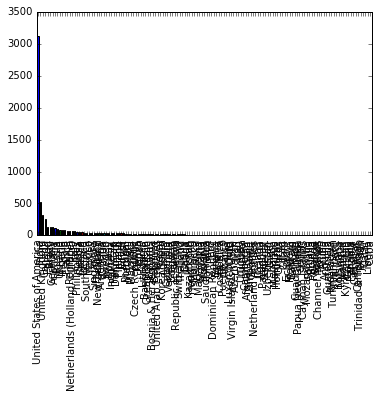

In [7]:
df['CountryLive'].value_counts()
df['CountryLive'].value_counts().plot.bar()

### analyze coder locations

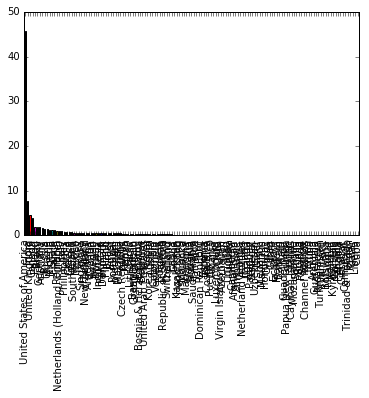

In [8]:
coder_loc_freq = df['CountryLive'].value_counts()
coder_loc_freq = coder_loc_freq / coder_loc_freq.sum() *100
coder_loc_freq.plot.bar()

In [9]:
coder_loc_freq.head(5)

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64

### coder's willingness to pay

In [10]:
df['MonthsProgramming'] = df['MonthsProgramming'].apply(lambda x: 1 if x ==0 else x)
df['Dollar_per_month'] = df['MoneyForLearning']/df['MonthsProgramming']
df['Dollar_per_month'].value_counts(dropna=False).sort_values(ascending=False).head(10)

 0.000000      3092
NaN             675
 50.000000      128
 25.000000      120
 16.666667      118
 100.000000     118
 33.333333      109
 8.333333       105
 20.000000       88
 10.000000       83
Name: Dollar_per_month, dtype: int64

In [11]:
df = df.dropna(subset=['Dollar_per_month'])

In [12]:
df['Dollar_per_month'].value_counts(ascending=False).head(5)

0.000000      3092
50.000000      128
25.000000      120
16.666667      118
100.000000     118
Name: Dollar_per_month, dtype: int64

In [13]:
df['CountryLive'].value_counts(dropna=False).head(5)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

##### selecte countries of interest

In [19]:
c1=df['CountryLive']=='United States of America'
c2=df['CountryLive']=='India'
c3=df['CountryLive']=='United Kingdom'
c4=df['CountryLive']=='Canada'
df1 = df.loc[c1|c2|c3|c4]
df1['CountryLive'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [20]:
df1_group = df1.groupby('CountryLive')
df1_group['Dollar_per_month'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: Dollar_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f48f97286d8>,
 <a list of 4 Text xticklabel objects>)

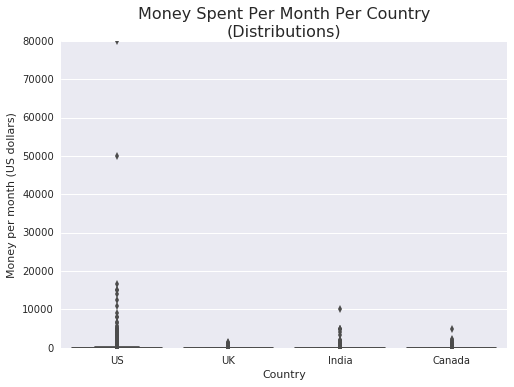

In [25]:
import seaborn as sns
sns.boxplot(y = 'Dollar_per_month', x = 'CountryLive', data = df1)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [39]:
df2 = df1[df1['Dollar_per_month'] < 20000]
print(df1.shape, df2.shape)

(3915, 137) (3913, 137)


In [40]:
df2_group = df2.groupby('CountryLive')
df2_group['Dollar_per_month'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: Dollar_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f48f95619e8>,
 <a list of 4 Text xticklabel objects>)

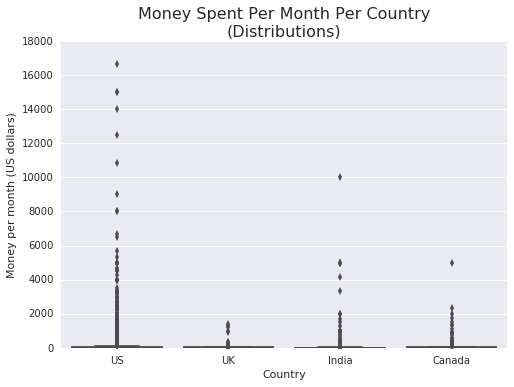

In [41]:
sns.boxplot(y = 'Dollar_per_month', x = 'CountryLive', data = df2)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [55]:
s1 = df2['CountryLive'] == 'United States of America'
s2 = df2['Dollar_per_month'] >= 6000
df2_cleaned = df2.drop(df2[s1&s2].index)
df2_cleaned.shape

(3902, 137)

In [56]:
s1 = df2_cleaned['CountryLive'] == 'India'
s2 = df2_cleaned['Dollar_per_month'] > 2500
df2_cleaned = df2_cleaned.drop(df2_cleaned[s1&s2].index)
df2_cleaned.shape

(3896, 137)

In [57]:
s1 = df2_cleaned['CountryLive'] == 'Canada'
s2 = df2_cleaned['Dollar_per_month'] > 4000
df2_cleaned = df2_cleaned.drop(df2_cleaned[s1&s2].index)
df2_cleaned.shape

(3895, 137)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f49095f3358>,
 <a list of 4 Text xticklabel objects>)

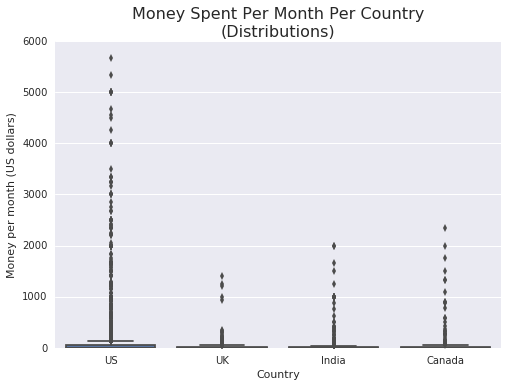

In [59]:
sns.boxplot(y = 'Dollar_per_month', x = 'CountryLive', data = df2_cleaned)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [60]:
df2_cleaned_group = df2_cleaned.groupby('CountryLive')
df2_cleaned_group['Dollar_per_month'].mean()

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: Dollar_per_month, dtype: float64

Apparently, students in US, Canada and India are all willing to pay monthly premiums that are above the basic premium of $59.  Therefore, they are all potential market for addiitonal advertisement.